In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

print(tf.__version__)
print(len(tf.config.experimental.list_physical_devices('GPU')))

2025-09-28 22:12:04.065898: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-28 22:12:04.192072: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-28 22:12:04.433475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-28 22:12:04.674194: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-28 22:12:04.675998: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-28 22:12:05.021793: I tensorflow/core/platform/cpu_feature_guard.cc:

2.16.2
0


In [ ]:
#IMPORTAÇÃO E NORRMALIZAÇÃO
(x_train, y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()
#x_train = x_train.reshape(-1, 28, 28, 1)
#x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

#CRIAR DATASET
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(50000).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

2025-09-28 22:12:12.594349: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1228800000 exceeds 10% of free system memory.
2025-09-28 22:12:13.517641: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.


In [ ]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(32, 32,3),batch_size=64),

        keras.layers.Conv2D(32, (3, 3), name="conv1", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn1"),
        keras.layers.Conv2D(32, (3, 3),name="conv2", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn2"),
        keras.layers.MaxPooling2D(pool_size=(2, 2),name="mp1"),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(64, (3, 3),name="conv3", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn3"),
        keras.layers.Conv2D(64, (3, 3),name="conv4", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn4"),
        keras.layers.MaxPooling2D(pool_size=(2, 2),name="mp2"),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(128, (3, 3),name="conv5", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn5"),
        keras.layers.Conv2D(128, (3, 3),name="conv6", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn6"),
        keras.layers.MaxPooling2D(pool_size=(2, 2),name="mp3"),
        keras.layers.Dropout(0.2),

        keras.layers.Flatten(name = "flatten"),

        keras.layers.Dense(256, name="dense1", activation='relu'),
        keras.layers.Dense(128, name="dense2", activation='relu', kernel_initializer='he_uniform'),
        keras.layers.BatchNormalization(name="bn7"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, name="dense3", activation='softmax')
    ],
    name="modelo-0.0",
)

for layer in model.trainable_variables:
    #print(layer.name)
    if 'bias' in layer.name:
        new_bias = tf.cast(tf.where(tf.abs(layer) >= 0, 0.1, 0.1), tf.float32)
        layer.assign(new_bias)

model.summary()

Model: "modelo-0.0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (64, 32, 32, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (64, 32, 32, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (64, 32, 32, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (64, 32, 32, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp1 (MaxPooling2D)              │ (64, 16, 16, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (64, 16, 16, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (64, 16, 16, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (64, 16, 16, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (64, 16, 16, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (64, 16, 16, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp2 (MaxPooling2D)              │ (64, 8, 8, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (64, 8, 8, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (64, 8, 8, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn5 (BatchNormalization)        │ (64, 8, 8, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (64, 8, 8, 128)        │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn6 (BatchNormalization)        │ (64, 8, 8, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp3 (MaxPooling2D)              │ (64, 4, 4, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (64, 4, 4, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (64, 2048)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (64, 256)              │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (64, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn7 (BatchNormalization)        │ (64, 128)              │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (64, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (64, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 848,042 (3.24 MB)

 Trainable params: 846,890 (3.23 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

class QuantizationTrainer:
    def __init__(self, model, train_ds, test_ds, loss_fn,
                 train_accuracy, test_accuracy,
                 epochs=40, n_bits=4, learning_rate=0.05, momentum =0.9):

        self.model = model
        self.train_ds = train_ds
        self.test_ds = test_ds
        self.loss_fn = loss_fn
        self.train_accuracy = train_accuracy
        self.test_accuracy = test_accuracy

        # hyperparameters
        self.epochs = epochs
        self.n_bits = n_bits
        self.learning_rate = learning_rate
        self.momentum = 0.9
        self.v = [0]*len(model.trainable_weights)

        # logs
        self.model_sparsity = []
        self.model_train_loss = []
        self.model_train_acc = []
        self.model_test_loss = []
        self.model_test_acc = []

    def quantize_weights(self):
        """Quantiza pesos do modelo."""
        if self.n_bits <= 0:
            return

        for i, layer_weights in enumerate(self.model.trainable_variables):
            if 'bn' in layer_weights.name:
                continue
            qk_line = (tf.reduce_max(tf.math.abs(layer_weights))) / (2 ** (self.n_bits - 1) - 1)
            qk_line = tf.maximum(qk_line, 1e-9)
            ck = tf.math.round(layer_weights / qk_line) * qk_line
            layer_weights.assign(ck)
            #if qk_line != 0.0:


    def train(self):
        np.set_printoptions(threshold=np.inf)

        for epoch in range(self.epochs):
            acc_epoch_mean, loss_epoch_mean = [], []
            acct_epoch_mean, losst_epoch_mean = [], []

            # Treino
            for step, (x_batch_train, y_batch_train) in enumerate(self.train_ds):

                # cópia do modelo para atualização
                if self.n_bits > 0:
                    model_copy = keras.models.clone_model(self.model)
                    model_copy.set_weights(self.model.get_weights())
                    self.quantize_weights()

                with tf.GradientTape() as tape:
                    pred = self.model(x_batch_train, training=True)
                    loss = self.loss_fn(y_batch_train, pred)

                grads = tape.gradient(loss, self.model.trainable_weights)

                # atualização manual dos pesos
                if self.n_bits == 0:
                    for i, layer_weights in enumerate(self.model.trainable_variables):
                        grads[i] = grads[i] * self.learning_rate
                        #grads[i] = tf.clip_by_value(grads[i], -1.0, 1.0) * self.learning_rate
                        layer_weights.assign(tf.math.subtract(layer_weights, grads[i]))
                else:

                    for i, (layer_weights, copied_weights) in enumerate(zip(model.trainable_variables, model_copy.trainable_variables)):
                        if step ==0 and epoch ==0:
                              self.v[i]=grads[i]*0
                        grads[i] = tf.clip_by_value(grads[i], -1.0, 1.0) * self.learning_rate
                        self.v[i] = tf.math.subtract(self.momentum*self.v[i], grads[i])
                        layer_weights.assign(tf.math.add(copied_weights, self.v[i]))

                predictions = tf.argmax(pred, axis=1, output_type=tf.int32)
                yy = tf.argmax(y_batch_train, axis=1, output_type=tf.int32)
                acc = self.train_accuracy(tf.reshape(y_batch_train, [-1]), predictions)

                acc_epoch_mean.append(acc)
                loss_epoch_mean.append(loss)

                train_accuracy.update_state(yy,predictions)

            if self.n_bits > 0:
                self.quantize_weights()

            # Teste
            for step, (x_batch_test, y_batch_test) in enumerate(self.test_ds):
                test_pred = self.model(x_batch_test, training=False)
                test_loss = self.loss_fn(y_batch_test, test_pred)
                test_prediction = tf.argmax(test_pred, axis=1, output_type=tf.int32)

                test_acc = self.test_accuracy(tf.reshape(y_batch_test, [-1]), test_prediction)

                acct_epoch_mean.append(test_acc)
                losst_epoch_mean.append(test_loss)

            #self.test_accuracy.reset_states()

            # salvar métricas
            self.model_test_acc.append(np.mean(acct_epoch_mean) * 100)
            self.model_test_loss.append(np.mean(losst_epoch_mean) * 100)
            #self.model_sparsity.append(sparsity)
            self.model_train_acc.append(np.mean(acc_epoch_mean))
            self.model_train_loss.append(np.mean(loss_epoch_mean))

            print("Epoch {}/{} \t Loss = {:.3f} \t Train Acc = {:.3f}% \t Test Acc = {:.3f}%".format(
                epoch + 1, self.epochs, float(loss), float(acc * 100), float(test_acc * 100)
            ))


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
train_accuracy = tf.keras.metrics.Accuracy()
test_accuracy = tf.keras.metrics.Accuracy()

In [ ]:
trainer = QuantizationTrainer(model, train_ds, test_ds, loss_fn, train_accuracy, test_accuracy, epochs=10)
trainer.train()

2025-09-28 22:45:23.654179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 22:45:23.690662: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.
2025-09-28 22:45:40.092299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/10 	 Loss = 1.565 	 Train Acc = 29.257% 	 Test Acc = 60.900%


2025-09-28 22:53:29.635236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 22:53:45.812654: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2/10 	 Loss = 1.238 	 Train Acc = 33.570% 	 Test Acc = 61.200%


2025-09-28 23:01:31.401558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 23:01:47.670787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3/10 	 Loss = 1.134 	 Train Acc = 36.093% 	 Test Acc = 65.440%


2025-09-28 23:09:30.109027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 23:09:45.969001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4/10 	 Loss = 0.478 	 Train Acc = 37.735% 	 Test Acc = 67.332%


2025-09-28 23:17:35.870685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 23:17:52.040928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5/10 	 Loss = 1.054 	 Train Acc = 38.969% 	 Test Acc = 69.026%


2025-09-28 23:25:38.762285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 23:25:54.823731: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6/10 	 Loss = 0.607 	 Train Acc = 39.975% 	 Test Acc = 70.238%


2025-09-28 23:33:41.816399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 23:34:30.966311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7/10 	 Loss = 0.365 	 Train Acc = 40.798% 	 Test Acc = 71.026%


2025-09-28 23:42:14.724701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 23:42:30.462097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8/10 	 Loss = 0.445 	 Train Acc = 41.485% 	 Test Acc = 72.243%


2025-09-28 23:50:36.040407: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-28 23:50:52.373886: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9/10 	 Loss = 0.319 	 Train Acc = 42.078% 	 Test Acc = 73.191%


2025-09-28 23:58:55.151610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 10/10 	 Loss = 0.347 	 Train Acc = 42.606% 	 Test Acc = 73.896%


2025-09-28 23:59:11.718893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


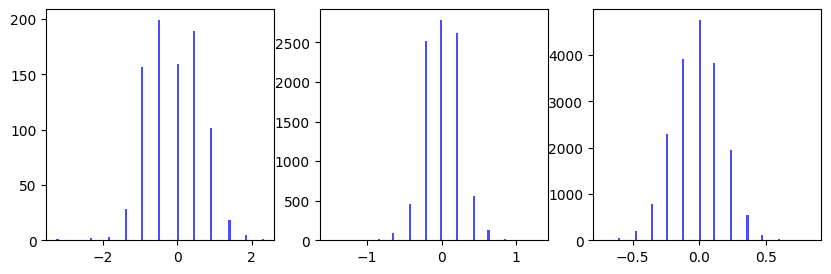

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
i = 0
for l in trainer.model.trainable_weights:
    if l.name == "kernel":
        f_w = tf.reshape(l, [-1])
        axes[i].hist(f_w, bins=100, color="blue", alpha=0.7)
        i+=1
        if i == 3:
            break